# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3
!pip install matplotlib==2.2.3

You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [4]:
edges = [tuple(x) for x in data.values.tolist()]
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [6]:
# A = list(nx.connected_component_subgraphs(B))[0]
A = list(B.subgraph(c).copy() for c in nx.connected_components(B))[0]

In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


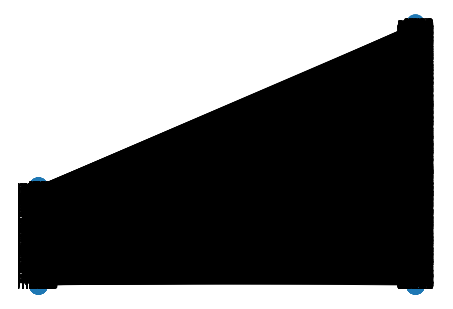

In [8]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [9]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [10]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [11]:
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5)

In [12]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [13]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

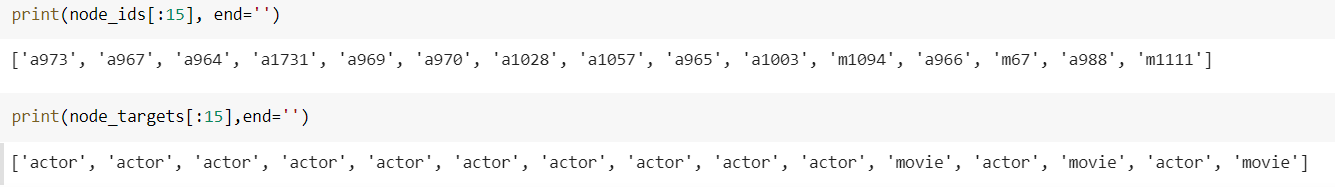

In [14]:
node_embeddings

array([[ 1.5548432e+00, -1.3518441e-01,  1.2674716e+00, ...,
         3.2345310e-01,  4.1472593e-01,  6.0581356e-01],
       [-2.1836473e-01, -1.6169374e-01,  3.9369151e-02, ...,
        -8.9510399e-01, -8.1610978e-01, -5.7118833e-01],
       [ 1.2108054e+00, -2.0195518e-01,  1.0481340e+00, ...,
         4.4552255e-01, -3.4585127e-01,  1.0918733e+00],
       ...,
       [ 9.7107124e-03, -6.4977691e-02,  7.7611513e-02, ...,
        -2.1379050e-02,  3.4128446e-03, -1.0399455e-01],
       [-1.1965361e-01, -6.3021399e-02,  2.7567927e-02, ...,
        -1.9304261e-02,  5.9530463e-02, -1.0789184e-01],
       [ 1.7288864e-02, -2.7337741e-02,  4.1437548e-02, ...,
         1.1188070e-03, -2.7771166e-02,  1.9693552e-02]], dtype=float32)

In [15]:
node_ids

['a973',
 'a967',
 'a964',
 'a1731',
 'a970',
 'a969',
 'a1028',
 'a1003',
 'a965',
 'a1057',
 'm1094',
 'm67',
 'm1111',
 'a959',
 'a966',
 'a988',
 'm1100',
 'a49',
 'a1037',
 'a93',
 'a962',
 'a971',
 'a963',
 'a1076',
 'a1030',
 'a1016',
 'm1095',
 'a977',
 'a1027',
 'a204',
 'a960',
 'a472',
 'a631',
 'a768',
 'a968',
 'a1020',
 'm1112',
 'a1004',
 'a2715',
 'a407',
 'a1026',
 'a1035',
 'm1001',
 'a1507',
 'a975',
 'a972',
 'm148',
 'a138',
 'm1096',
 'a1031',
 'a306',
 'm1114',
 'm1113',
 'a1036',
 'm376',
 'a205',
 'a1008',
 'm1272',
 'm987',
 'm1261',
 'm126',
 'm453',
 'm816',
 'm1097',
 'a1021',
 'a987',
 'm1220',
 'm1106',
 'm1232',
 'm1357',
 'a1435',
 'a1038',
 'm121',
 'a921',
 'm1022',
 'a1467',
 'm964',
 'm25',
 'm1000',
 'a782',
 'm796',
 'm32',
 'm26',
 'a976',
 'm902',
 'm154',
 'a1011',
 'a1060',
 'm115',
 'm1213',
 'm165',
 'm990',
 'm1045',
 'm75',
 'm983',
 'm122',
 'a228',
 'a974',
 'a1015',
 'a1436',
 'm995',
 'a1750',
 'm616',
 'a1005',
 'm890',
 'm129',
 'm10

In [16]:
node_targets

['actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'movie',
 'movie',
 'movie',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'actor',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'actor',
 'actor',
 'movie',
 'actor',
 'movie',
 'actor',
 'actor',
 'movie',
 'movie',
 'actor',
 'movie',
 'actor',
 'actor',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'actor',
 'actor',
 'movie',
 'movie',
 'movie',
 'movie',
 'actor',
 'actor',
 'movie',
 'actor',
 'movie',
 'actor',
 'movie',
 'movie',
 'movie',
 'actor',
 'movie',
 'movie',
 'movie',
 'actor',
 'movie',
 'movie',
 'actor',
 'actor',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'movie',
 'actor',
 'actor',
 'actor',
 'actor',


In [17]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for i in range(len(node_embeddings)):
        if node_targets[i] == 'actor' and node_ids[i][0] == 'a':
            actor_embeddings.append(node_embeddings[i])
            actor_nodes.append(node_ids[i])
        else:
            movie_embeddings.append(node_embeddings[i])
            movie_nodes.append(node_ids[i])
           

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings

actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [18]:
len(actor_nodes)

3411

<font color='cyan'>Grader function - 1</font>

In [19]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [20]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [21]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    # calculate cost1 
    cost1= (len(max(nx.connected_components(graph), key=len)) / len(set(graph.nodes()))) * 1/number_of_clusters
    return cost1

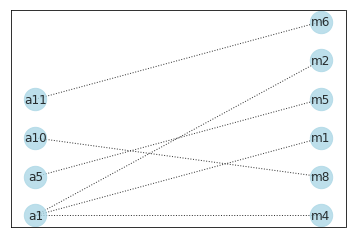

In [22]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [23]:
graded_graph.number_of_edges()

6

<font color='cyan'>Grader function - 3</font>

In [24]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [25]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    m_nodes = len([i for i in graph.nodes() if i[0] == 'm'])
    # calculate cost2
    cost2= (graph.number_of_edges() / m_nodes) * 1/number_of_clusters
    return cost2

In [57]:
def cost2_m(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    a_nodes = len([i for i in graph.nodes() if i[0] == 'a'])
    # calculate cost2
    cost2= (graph.number_of_edges() / a_nodes) * 1/number_of_clusters
    return cost2

<font color='cyan'>Grader function - 4</font>

In [26]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [36]:
def cluster_with_max_cost_custom(cluster_list):
    cost_cluster = []
    for number_of_clusters in cluster_list:
       # initialize cost
        cost1_1 = 0;  cost2_2 = 0 
        algo = KMeans(n_clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
        algo.fit(actor_embeddings)
        # You can get the labels for corresponding actor nodes (algo.labels_)
        labels = algo.labels_
        actor_cluster_list = list(zip(actor_nodes, labels))
#         print('actor_cluster_list', actor_cluster_list)
        for c in range(number_of_clusters):
            # Actors in cluster c
            act_in_cluster_c = [x[0] for x in actor_cluster_list if x[1] == c]
#             print('act_in_cluster_' + str(c), act_in_cluster_c)
            sub_graph = nx.Graph()
            movs_acts = []; mov_list = []
            for act_node in act_in_cluster_c:
#                 cluster_graph = nx.ego_graph(B, act_node, radius=1)
#                 sub_graph.add_nodes_from(cluster_graph.nodes())
#                 sub_graph.add_edges_from(cluster_graph.edges())
                  mov_ids = list(B[act_node].keys())  # movie_ids linked to this actor_node
                  mov_list.extend(mov_ids)
                  movs_acts.extend(list(zip([act_node] * len(mov_ids), mov_ids))) # returns edges b/w actor nodes and movies
            sub_graph.add_nodes_from(act_in_cluster_c, bipartite=0) 
            sub_graph.add_nodes_from(list(set(mov_list)), bipartite=1)
            sub_graph.add_edges_from(movs_acts)
            cost1_1 += cost1(sub_graph, number_of_clusters)
            cost2_2 += cost2(sub_graph, number_of_clusters)
        cost_cluster.append((number_of_clusters, cost1_1*cost2_2))
    print('cost_cluster', cost_cluster)    
    cost_cluster.sort(key = lambda x :x[1])
    return cost_cluster[-1][0]

In [63]:
def cluster_with_max_cost_movie(cluster_list):
    cost_cluster = []
    for number_of_clusters in cluster_list:
       # initialize cost
        cost1_1 = 0;  cost2_2 = 0 
        algo = KMeans(n_clusters=number_of_clusters)
        algo.fit(movie_embeddings)
        labels = algo.labels_
        movie_cluster_list = list(zip(movie_nodes, labels))
        for c in range(number_of_clusters):
            # Movies in cluster c
            mov_in_cluster_c = [x[0] for x in movie_cluster_list if x[1] == c]
            sub_graph = nx.Graph()
            for mov_node in mov_in_cluster_c:
                cluster_graph = nx.ego_graph(B, mov_node, radius=1)
                sub_graph.add_nodes_from(cluster_graph.nodes())
                sub_graph.add_edges_from(cluster_graph.edges())
            cost1_1 += cost1(sub_graph, number_of_clusters)
            cost2_2 += cost2_m(sub_graph, number_of_clusters)
        cost_cluster.append((number_of_clusters, cost1_1*cost2_2))
    print('cost_cluster', cost_cluster)    
    cost_cluster.sort(key = lambda x :x[1])
    return cost_cluster[-1][0]

In [37]:
# without ego graph
cluster_list = [3, 5, 10, 30, 50, 100, 200, 500]
# cluster_list = [3, 5, 10]
print(cluster_with_max_cost_custom(cluster_list))

cost_cluster [(3, 3.7248493174104076), (5, 2.8628964970914814), (10, 2.4301208247649604), (30, 1.734760596439032), (50, 1.8022448716538653), (100, 1.588928230171151), (200, 1.6986928158527517), (500, 1.9099810487798554)]
3


In [32]:
def cluster_with_max_ego_graph(cluster_list):
    cost_cluster = []
    for number_of_clusters in cluster_list:
       # initialize cost
        cost1_1 = 0;  cost2_2 = 0 
        algo = KMeans(n_clusters=number_of_clusters)
        algo.fit(actor_embeddings)
        # You can get the labels for corresponding actor nodes (algo.labels_)
        cluster_number_for_dp = algo.labels_
        list_of_all_clusters = []
        unique_clusters = np.unique(cluster_number_for_dp)
        # dict for actor-cluster
        actor_cluster_dict = dict(zip(actor_nodes, cluster_number_for_dp))
        for cluster_number in unique_clusters:
            cluster = []
            for node,number in actor_cluster_dict.items():
                if number == cluster_number:
                    cluster.append(node)
            list_of_all_clusters.append(cluster)
#         print('list_of_all_clusters', len(list_of_all_clusters))
        for cluster in list_of_all_clusters:
            sub_graph = nx.Graph()
            for actor_node in cluster:
                cluster_graph = nx.ego_graph(B, actor_node, radius=1)
                sub_graph.add_nodes_from(cluster_graph.nodes())
                sub_graph.add_edges_from(cluster_graph.edges())
            cost1_1 += cost1(sub_graph, number_of_clusters)
            cost2_2 += cost2(sub_graph, number_of_clusters)
        cost_cluster.append((number_of_clusters, cost1_1*cost2_2))
    print('cost_cluster', cost_cluster)    
    cost_cluster.sort(key = lambda x :x[1])
    return cost_cluster[-1][0]

In [33]:
cluster_list = [3, 5, 10, 30, 50, 100, 200, 500]
# cluster_list = [3, 5, 10]
print(cluster_with_max_ego_graph(cluster_list))

cost_cluster [(3, 3.7171158516888494), (5, 2.8934128172179787), (10, 2.4036168454605638), (30, 1.8470679972960071), (50, 1.6565482922670354), (100, 1.5652236184531205), (200, 1.5459947288380724), (500, 1.8873411155912831)]
3


<font color='blue'>Displaying similar actor</font>

In [ ]:
# best cluster = 3
# training on best cluster
kmeans = KMeans(n_clusters = 3)
kmeans.fit(actor_embeddings)
labels = kmeans.labels_

from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

In [90]:
# create mapping of pts on x axis and their corresponding labels
x = actor_embeddings_2d[:,0]
dx = {x[i]: labels[i] for i in range(len(labels))}
# create mapping of pts on y axis and their corresponding labels
y = actor_embeddings_2d[:,1]
dy = {y[i]: labels[i] for i in range(len(labels))}

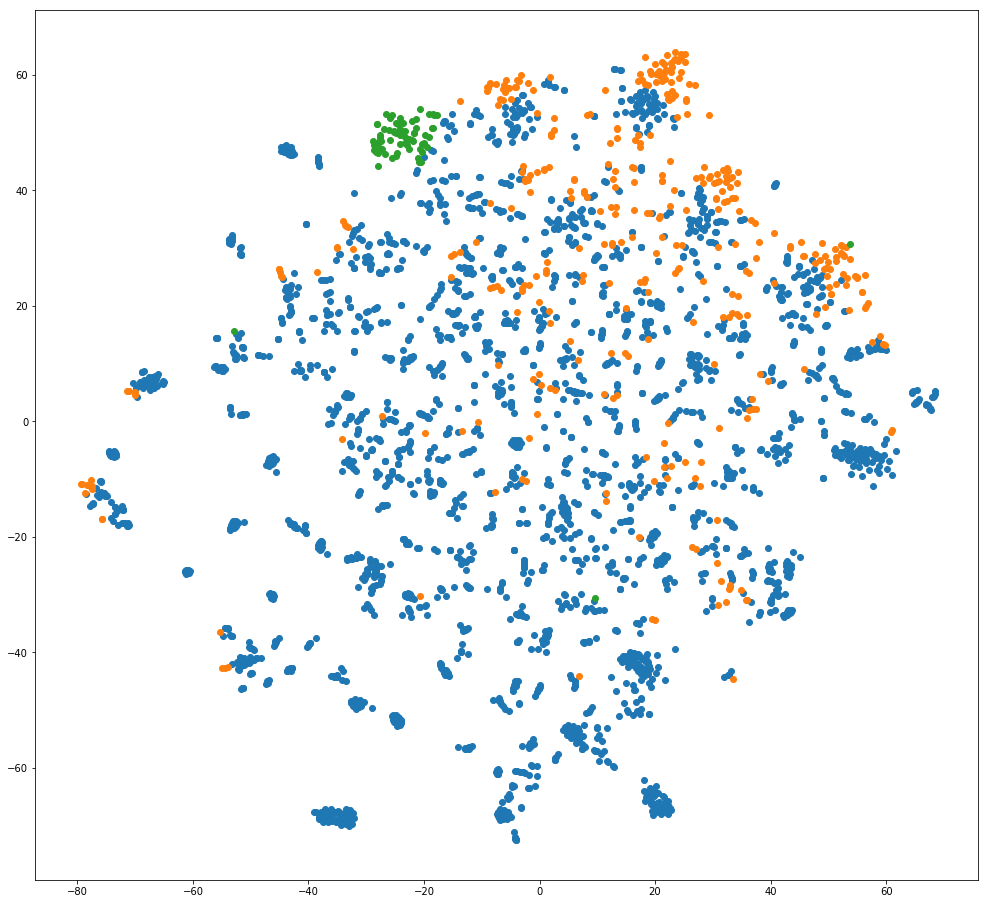

In [99]:
# Plotting
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
for c in np.unique(labels):
    plt.scatter([a for a, l in dx.items() if dx[a] == c], [a for a, l in dy.items() if dy[a] == c])

plt.show()    

<font color='blue'>Grouping similar movies</font>

In [64]:
print(cluster_with_max_cost_movie(cluster_list))

cost_cluster [(3, 2.987300486287015), (5, 2.674718120273564), (10, 2.215191730745869), (30, 2.1472616142459517), (50, 1.8195184727232219), (100, 1.5555719295817867), (200, 1.3624350335190092), (500, 1.2093113513208524)]
3


<font color='blue'>Displaying similar movie clusters</font>

In [101]:
# best cluster = 3
# training on best cluster
from sklearn.manifold import TSNE
transform = TSNE #PCA
kmeans = KMeans(n_clusters = 3)
kmeans.fit(movie_embeddings_2d)
labels = kmeans.labels_
print(labels)


trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

[2 2 2 ... 0 0 0]


In [ ]:
# create mapping of pts on x axis and their corresponding labels
x = movie_embeddings_2d[:,0]
dx = {x[i]: labels[i] for i in range(len(labels))}
# create mapping of pts on y axis and their corresponding labels
y = movie_embeddings_2d[:,1]
dy = {y[i]: labels[i] for i in range(len(labels))}

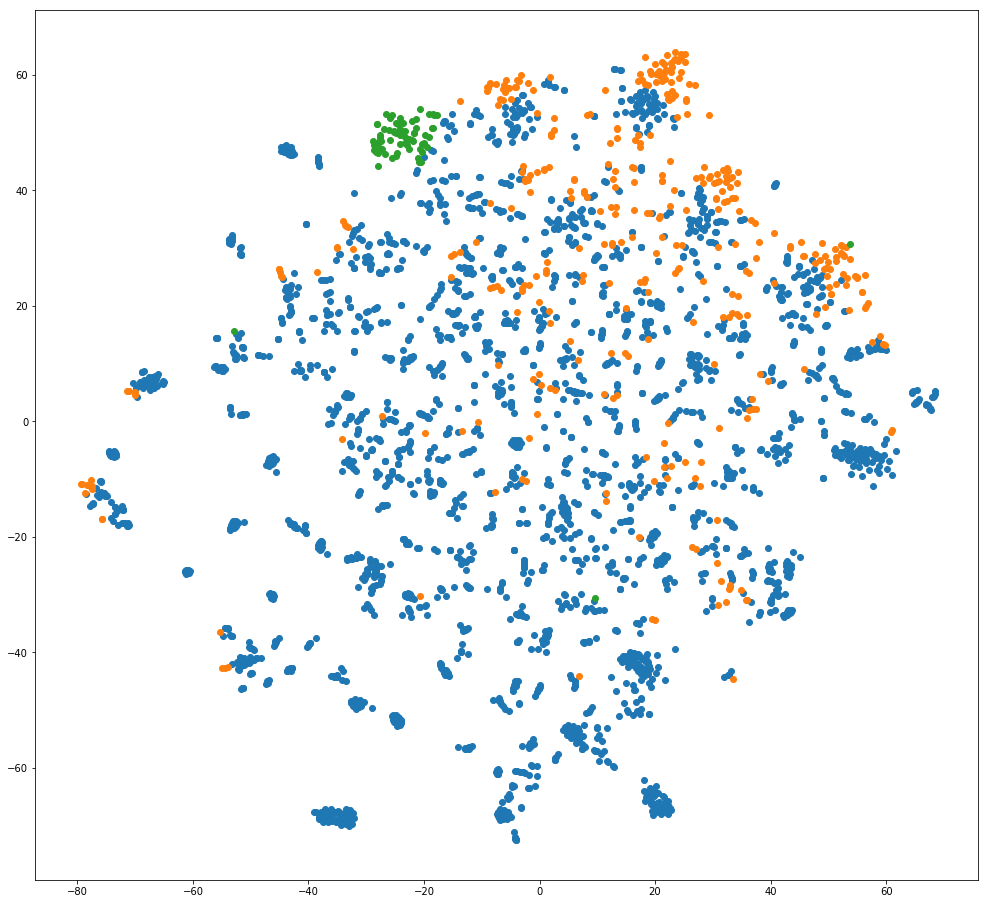

In [102]:
# Plotting
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
for c in np.unique(labels):
    plt.scatter([a for a, l in dx.items() if dx[a] == c], [a for a, l in dy.items() if dy[a] == c])

plt.show()    